In [1]:
import glob as glob
import matplotlib.pyplot as plt
import pickle as pkl
import numpy as np

In [2]:
%matplotlib ipympl

In [3]:
# settings for which files to parse
bIgnoreLeadingMisses = True

# All participant data

In [4]:
# insert subject name here:
subject_name="*"
if bIgnoreLeadingMisses:
    graph_data_files = glob.glob('temp_data/no_leading_misses/'+subject_name+'*OFDvEcc.*')
else:
    graph_data_files = glob.glob('temp_data/all_leading_misses/'+subject_name+'*OFDvEcc.*')

427 337 90


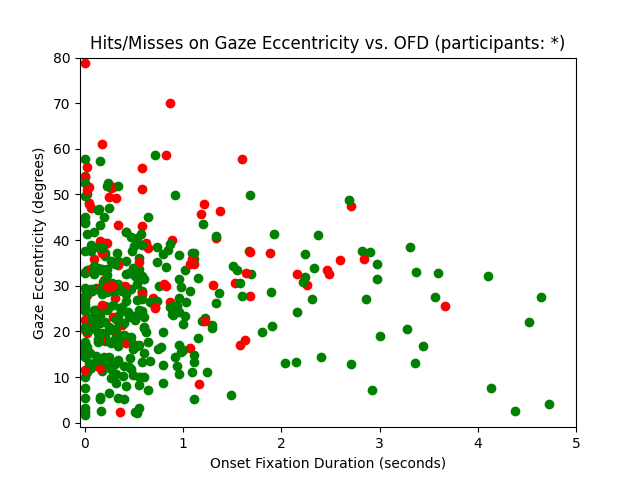

In [5]:
fig, ax = plt.subplots()

total_targets = 0
hits = 0
misses = 0

for filename in graph_data_files:
    # laod the data, and add to plot
    with open(filename, 'rb') as f:
        graph_data_tuples = pkl.load(f)
    num_entries = 5
    for i in range(int(len(graph_data_tuples)/num_entries)):
        OFD = graph_data_tuples[num_entries*i]
        eccentricity = graph_data_tuples[num_entries*i+1]
        response = graph_data_tuples[num_entries*i+2]
        pitch = graph_data_tuples[num_entries*i+3]
        yaw = graph_data_tuples[num_entries*i+4]
        ax.scatter(OFD, eccentricity, c='r' if response else 'g')
        total_targets +=1
        if response:
            misses += 1
        else:
            hits += 1

ax.set_ylim(-1, 80)
ax.set_xlim(-0.05, 5)
ax.set_xlabel("Onset Fixation Duration (seconds)")
ax.set_ylabel("Gaze Eccentricity (degrees)")

ax.set_title("Hits/Misses on Gaze Eccentricity vs. OFD (participants: {})".format(subject_name))
print( total_targets, hits, misses)

In [6]:
# construct data
yaws = np.array([])
pitches = np.array([])
OFDs = np.array([])
eccs = np.array([])
responses_original = np.array([])

for filename in graph_data_files:
    # laod the data, and add to plot
    with open(filename, 'rb') as f:
        graph_data_tuples = pkl.load(f)
    num_entries = 5
    for i in range(int(len(graph_data_tuples)/num_entries)):
        OFDs = np.append(OFDs, graph_data_tuples[num_entries*i])
        eccs = np.append(eccs, graph_data_tuples[num_entries*i+1])
        responses_original = np.append(responses_original, graph_data_tuples[num_entries*i+2])
        pitches = np.append(pitches, graph_data_tuples[num_entries*i+3]*(180/np.pi))
        yaws = np.append(yaws, graph_data_tuples[num_entries*i+4]*(180/np.pi))
        
# filter the data to remove outliers
eccOFD = np.vstack([OFDs, eccs]).T
time_idcs = eccOFD[:, 0] < 5.5
ecc_idcs = eccOFD[:, 1] < 100
valid = time_idcs * ecc_idcs
eccOFD = eccOFD[valid,:]
responses = responses_original[valid]

C:\Users\Abhijat\AppData\Local\Temp/ipykernel_8908/281243893.py:12: RuntimeWarning: invalid value encountered in true_divide
  zi = zi / counts


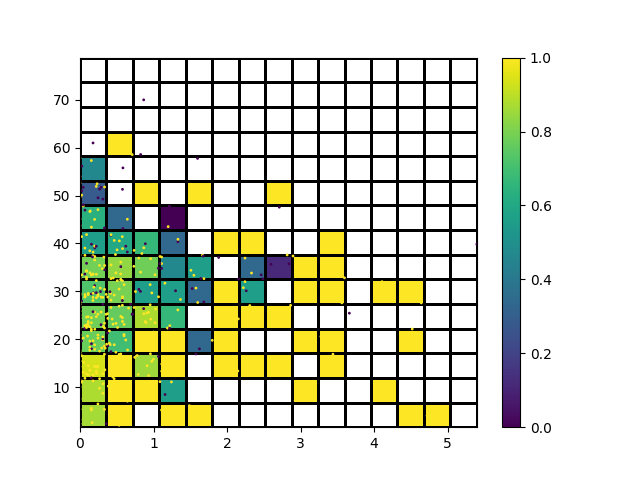

In [26]:
# discretized map

np.random.seed(1977)
x, y, z = np.random.random((3, 10))
x, y, z = eccOFD[:,0], eccOFD[:,1], 1-responses

# Bin the data onto a 10x10 grid
# Have to reverse x & y due to row-first indexing
zi, yi, xi = np.histogram2d(y, x, bins=(15,15), weights=z, normed=False)
counts, _, _ = np.histogram2d(y, x, bins=(15,15))

zi = zi / counts
zi = np.ma.masked_equal(zi, 0)

fig, ax = plt.subplots()
ax.pcolormesh(xi, yi, zi, edgecolors='black')
scat = ax.scatter(x, y, c=z, s=1)
colorbar = fig.colorbar(scat)
ax.margins(0.05)

plt.show()

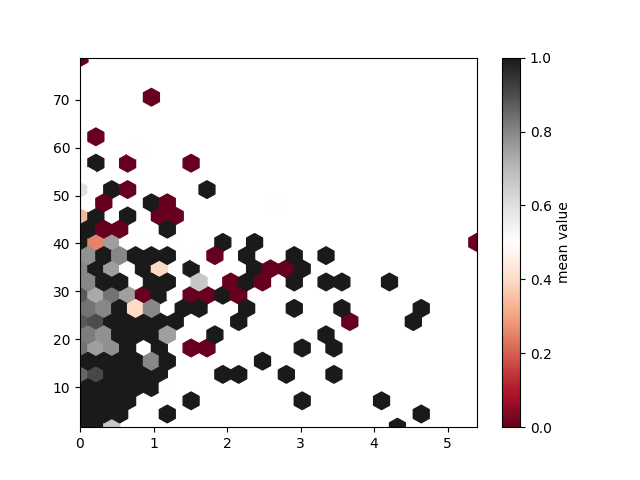

In [46]:
from matplotlib import cm 
from matplotlib import mlab as ml
plt.figure()
plt.hexbin(x, y, C=z, gridsize=25, cmap=cm.RdGy, bins=None)
plt.axis([x.min(), x.max(), y.min(), y.max()])

cb = plt.colorbar()
cb.set_label('mean value')
plt.show()   

## Selected participant data

In [8]:
# insert subject name here:
subject_name="dexter*"

In [9]:
if bIgnoreLeadingMisses:
    graph_data_files = glob.glob('temp_data/no_leading_misses/'+subject_name+'*OFDvEcc.*')
else:
    graph_data_files = glob.glob('temp_data/all_leading_misses/'+subject_name+'*OFDvEcc.*')

77 54 23


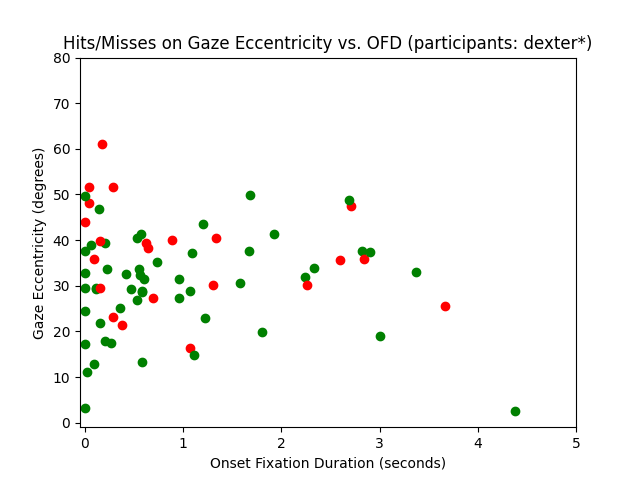

In [10]:
fig, ax = plt.subplots()

total_targets = 0
hits = 0
misses = 0

for filename in graph_data_files:
    # laod the data, and add to plot
    with open(filename, 'rb') as f:
        graph_data_tuples = pkl.load(f)
    num_entries = 5
    for i in range(int(len(graph_data_tuples)/num_entries)):
        OFD = graph_data_tuples[num_entries*i]
        eccentricity = graph_data_tuples[num_entries*i+1]
        response = graph_data_tuples[num_entries*i+2]
        pitch = graph_data_tuples[num_entries*i+3]
        yaw = graph_data_tuples[num_entries*i+4]
        ax.scatter(OFD, eccentricity, c='r' if response else 'g')
        total_targets +=1
        if response:
            misses += 1
        else:
            hits += 1

ax.set_ylim(-1, 80)
ax.set_xlim(-0.05, 5)
ax.set_xlabel("Onset Fixation Duration (seconds)")
ax.set_ylabel("Gaze Eccentricity (degrees)")

ax.set_title("Hits/Misses on Gaze Eccentricity vs. OFD (participants: {})".format(subject_name))
print( total_targets, hits, misses)